In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
a = pd.read_excel('E:\Data Science\exchange rate\Exchange rate.xlsx')#to read column 2

In [3]:

# Convert the 'Date' column to datetime format (if it's not already)
a['Date'] = pd.to_datetime(a['Date'])

# Set 'Date' as the index
a.set_index('Date', inplace=True)

# Display the DataFrame with 'Date' as the index
print(a.head(5))


             Price    Open    High     Low  Volume  Change
Date                                                      
2023-05-01  2.7452  2.7078  2.7467  2.6924     NaN  0.0133
2023-04-01  2.7090  2.7169  2.7608  2.6863     NaN -0.0029
2023-03-01  2.7169  2.6925  2.7192  2.6493     NaN  0.0097
2023-02-01  2.6908  2.7607  2.7697  2.6876     NaN -0.0251
2023-01-01  2.7600  2.7102  2.7622  2.6835     NaN  0.0187


In [4]:
b = a.drop(columns = ["Volume"])
b.head(5)

,Price,Open,High,Low,Change
Date,,,,,
2023-05-01,2.7452,2.7078,2.7467,2.6924,0.0133
2023-04-01,2.7090,2.7169,2.7608,2.6863,-0.0029
2023-03-01,2.7169,2.6925,2.7192,2.6493,0.0097
2023-02-01,2.6908,2.7607,2.7697,2.6876,-0.0251
2023-01-01,2.7600,2.7102,2.7622,2.6835,0.0187


In [5]:
b.isnull().sum()

Price     0
Open      0
High      0
Low       0
Change    0
dtype: int64

In [6]:
b.describe()

,Price,Open,High,Low,Change
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,2.960986,2.962040,3.004368,2.918493,0.000373
std,0.424433,0.424601,0.449368,0.400672,0.024313
min,2.293400,2.292600,2.293400,2.292600,-0.123100
25%,2.664200,2.662700,2.681000,2.653300,-0.013300
50%,2.849300,2.853400,2.906900,2.811100,0.000200
75%,3.323600,3.324000,3.383600,3.256000,0.015600
max,3.892600,3.891300,4.053300,3.777500,0.094200


In [7]:
b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 2023-05-01 to 1997-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   317 non-null    float64
 1   Open    317 non-null    float64
 2   High    317 non-null    float64
 3   Low     317 non-null    float64
 4   Change  317 non-null    float64
dtypes: float64(5)
memory usage: 14.9 KB


In [8]:
c = b.drop_duplicates().dropna().replace('', np.nan).dropna()
print(c.head(5))
df_cleaned = c.copy()

             Price    Open    High     Low  Change
Date                                              
2023-05-01  2.7452  2.7078  2.7467  2.6924  0.0133
2023-04-01  2.7090  2.7169  2.7608  2.6863 -0.0029
2023-03-01  2.7169  2.6925  2.7192  2.6493  0.0097
2023-02-01  2.6908  2.7607  2.7697  2.6876 -0.0251
2023-01-01  2.7600  2.7102  2.7622  2.6835  0.0187


In [9]:
print(df_cleaned.head(5))

             Price    Open    High     Low  Change
Date                                              
2023-05-01  2.7452  2.7078  2.7467  2.6924  0.0133
2023-04-01  2.7090  2.7169  2.7608  2.6863 -0.0029
2023-03-01  2.7169  2.6925  2.7192  2.6493  0.0097
2023-02-01  2.6908  2.7607  2.7697  2.6876 -0.0251
2023-01-01  2.7600  2.7102  2.7622  2.6835  0.0187


In [10]:



df = pd.DataFrame(df_cleaned)

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize all columns in the DataFrame
normalized_data = scaler.fit_transform(df)

# Create a new DataFrame with the normalized values
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

# Display the normalized DataFrame
print(normalized_df)


        Price      Open      High       Low    Change
0   -0.509214 -0.599720 -0.574308 -0.565178  0.532523
1   -0.594639 -0.578254 -0.542881 -0.580427 -0.134840
2   -0.575997 -0.635811 -0.635602 -0.672918  0.384220
3   -0.637588 -0.474935 -0.523044 -0.577177 -1.049374
4   -0.474289 -0.594059 -0.539761 -0.587426  0.754978
..        ...       ...       ...       ...       ...
312 -0.690447 -0.694311 -0.748828 -0.626922  0.627273
313 -0.787435 -0.792440 -0.840435 -0.730912 -0.431446
314 -0.724429 -0.728279 -0.780924 -0.662919 -0.472641
315 -0.653870 -0.660579 -0.714281 -0.591176 -0.633302
316 -0.557118 -0.563157 -0.622897 -0.487936  0.693185

[317 rows x 5 columns]


In [11]:
X = normalized_df.drop('Change', axis=1)  # Features (all columns except the target)
y = normalized_df['Change']  # Target variable


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)


In [13]:

model = LinearRegression()


In [14]:
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)


In [16]:

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.20792008988753388


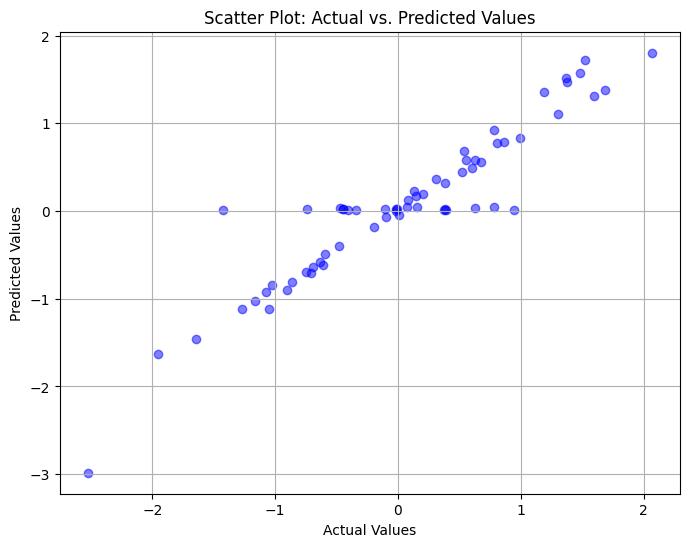

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='b', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Actual vs. Predicted Values")
plt.grid(True)
plt.show()

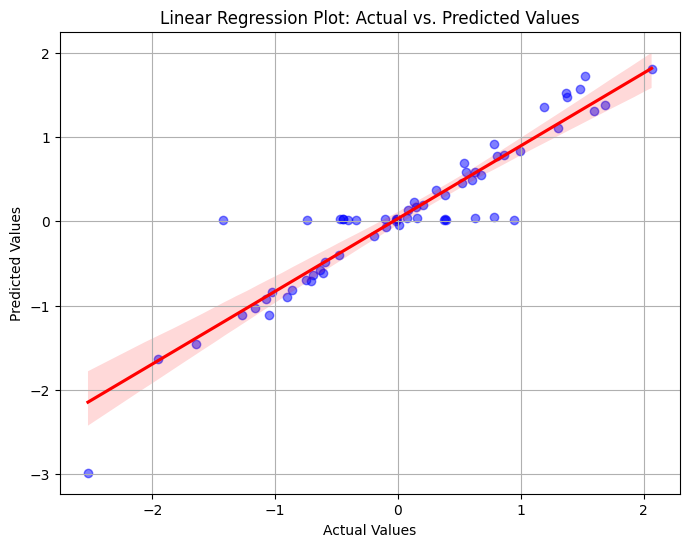

In [19]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'b', 'alpha': 0.5}, line_kws={'color': 'r'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Plot: Actual vs. Predicted Values")
plt.grid(True)
plt.show()